# Trainer Demo

In [11]:
# enable auto-reloading submodules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Init Trainer

In [12]:
from trainer import Trainer

trainer = Trainer(
    # target pathogen
    pathogen='Escherichia coli',
    # number of folds
    n_splits=5,
    # DRIAMS sites
    sites=['A'],
    # the years of the data to load
    years=[2015, 2016, 2017, 2018],
)

## Training

In [13]:
from lightgbm import LGBMClassifier

# Ceftriaxone
trainer.fit(
    drug='Ceftriaxone',
    model=LGBMClassifier(
        boosting_type='gbdt',
        learning_rate=0.05,
        n_estimators=10,
    )
)
# Ciprofloxacin
trainer.fit(
    drug='Ciprofloxacin',
    model=LGBMClassifier(
        boosting_type='gbdt',
        learning_rate=0.02,
        n_estimators=15,
    )
)
# Cefepime
trainer.fit(
    drug='Cefepime',
    model=LGBMClassifier(
        boosting_type='gbdt',
        learning_rate=0.01,
        n_estimators=20,
    )
)

Loading Ceftriaxone...
Training w/o SMOTE...
Fold 1/5...
AUC=0.5691244239631337, ACC=0.811491935483871, f1=0.24291497975708504
Fold 2/5...
AUC=0.5460829493087558, ACC=0.8014112903225806, f1=0.16877637130801687
Fold 3/5...
AUC=0.5668202764976958, ACC=0.8104838709677419, f1=0.23577235772357724
Fold 4/5...
AUC=0.5576036866359447, ACC=0.8064516129032258, f1=0.20661157024793386
Fold 5/5...
AUC=0.5316129032258065, ACC=0.7943548387096774, f1=0.12068965517241378
Training w/ SMOTE...
Fold 1/5...
AUC=0.7346543778801843, ACC=0.813508064516129, f1=0.5823927765237019
Fold 2/5...
AUC=0.7167741935483871, ACC=0.7933467741935484, f1=0.5514223194748359
Fold 3/5...
AUC=0.7615668202764977, ACC=0.8477822580645161, f1=0.6361445783132531
Fold 4/5...
AUC=0.7213824884792627, ACC=0.813508064516129, f1=0.566744730679157
Fold 5/5...
AUC=0.7699539170506913, ACC=0.842741935483871, f1=0.6405529953917051
Loading Ciprofloxacin...
Training w/o SMOTE...
Fold 1/5...
AUC=0.5, ACC=0.7147302904564315, f1=0.0
Fold 2/5...
AUC

## Results Collection

In [14]:
results = trainer.collect_results()
# export the results to csv files
# results.save_to('./results/test')

## Bar Graph

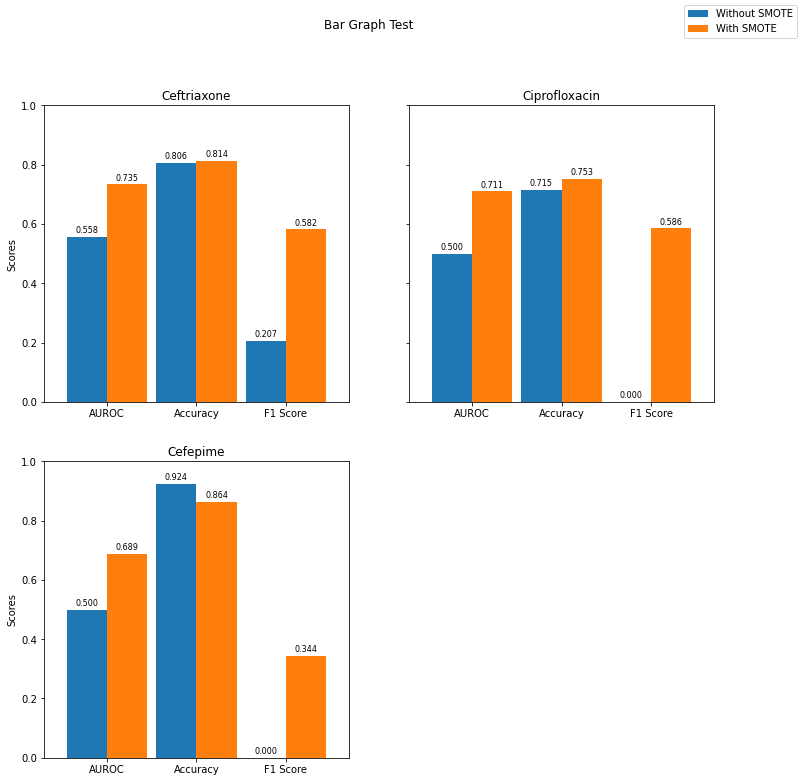

In [15]:
results.bar_plot(
    title='Bar Graph Test',
    # save_as='./results/test/bar.png',
    # drugs=['Ceftriaxone', 'Ciprofloxacin', 'Cefepime'],
    # metrics=['AUROC', 'Accuracy', 'F1 Score'],
    nrows=2,
    ncols=2,
    sharey=True,
    figsize=(12, 12),
    y_lim=(0, 1),
)

## Box Graph

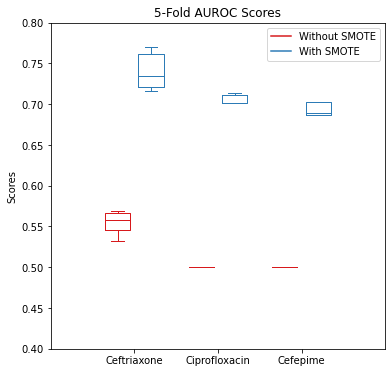

In [16]:
results.box_plot(
    # title='Box Graph Test',
    # save_as='./plots/box_test.png',
    subtitle_template='5-Fold {} Scores', # format subtitles (`{}` will be replaced with metrics' name)
    # drugs=['Ceftriaxone', 'Ciprofloxacin', 'Cefepime'],
    metrics=['AUROC'], # plot AUROC only
    y_lim=(0.4, 0.8), # set view limits for y-axis
    figsize=(6, 6),
)